# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
totalRides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
totalRides_by_type.to_frame()

,ride_id
type,
Rural,125
Suburban,625
Urban,1625


In [5]:
# 2. Get the total drivers for each city type
driverTotal_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
driverTotal_by_city_type.to_frame()

,driver_count
type,
Rural,78
Suburban,490
Urban,2405


In [6]:
#  3. Get the total amount of fares for each city type
totalFares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
totalFares_by_city_type.to_frame()

,fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [7]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = totalFares_by_city_type / totalRides_by_type
avg_fare_per_ride.to_frame()

,0
type,
Rural,34.623440
Suburban,30.970128
Urban,24.525772


In [8]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = totalFares_by_city_type / driverTotal_by_city_type
avg_fare_per_driver.to_frame()

,0
type,
Rural,55.486282
Suburban,39.502714
Urban,16.571468


In [9]:
#  6. Create a PyBer summary DataFrame. 
summary_df = pd.concat([totalRides_by_type, driverTotal_by_city_type, totalFares_by_city_type, avg_fare_per_ride, avg_fare_per_driver],axis=1)
summary_df

,ride_id,driver_count,fare,0,1
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_df.index.name = None
summary_df

,ride_id,driver_count,fare,0,1
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  8. Format the columns.
pyber_summary_df= summary_df.rename(columns={'ride_id':'Total Rides', 'driver_count':'Total Drivers','fare':'Total Fares', 0 :'Average Fare per Ride', 1 :'Average Fare per Driver'})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
## 8b. format data types
# change to float and add $
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.float_format = '${:,.2f}'.format

# add comma to integers
#???
pyber_summary_df



,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,$9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,$43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,$35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,$35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,$42.81,5327642267789,33,Urban


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
groupby_df = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
groupby_df

fare
type  date                      
Rural 2019-01-01 09:45:36 $43.69
      2019-01-02 11:18:32 $52.12
      2019-01-03 19:51:01 $19.90
      2019-01-04 03:31:26 $24.88
      2019-01-06 07:38:40 $47.33
      2019-01-08 06:19:45 $19.39
      2019-01-09 15:30:35 $31.84
      2019-01-11 04:39:27 $16.42
      2019-01-14 07:09:17 $18.05
      2019-01-14 15:58:48 $54.10
      2019-01-15 21:44:26 $30.26
      2019-01-18 00:46:28 $15.12
      2019-01-18 07:36:46 $43.57
      2019-01-19 11:40:46 $49.44
      2019-01-19 12:38:07 $38.68
      2019-01-19 20:21:54 $56.78
      2019-01-22 12:42:55 $13.50
      2019-01-22 15:36:24 $10.11
      2019-01-23 06:52:00 $40.24
      2019-01-24 13:32:12 $34.74
      2019-01-27 17:33:41 $42.68
      2019-01-27 18:43:05 $38.42
      2019-01-28 15:55:33 $31.25
      2019-01-30 00:05:47 $20.76
      2019-01-30 01:40:16 $37.05
      2019-01-30 10:55:23 $51.39
      2019-01-31 17:57:25 $58.29
      2019-02-01 08:59:24 $17.05
      2019-02-02 06:28:04 $53.07
      2019-02-02 14:54:00 $12.42
...                          ...
Urban 2019-05-05 14:17:49 $23.66
      2019-05-05 15:15:23 $38.15
      2019-05-05 15:47:32 $37.75
      2019-05-05 17:29:14 $30.47
      2019-05-05 17:38:07 $14.95
      2019-05-06 01:06:46 $17.63
      2019-05-06 05:05:46 $43.43
      2019-05-06 12:39:09 $40.79
      2019-05-06 19:34:45 $26.43
      2019-05-06 22:21:58 $27.16
      2019-05-06 23:22:49 $25.76
      2019-05-07 01:03:12 $12.35
      2019-05-07 02:52:22 $36.51
      2019-05-07 05:55:00  $6.89
      2019-05-07 08:47:24 $25.83
      2019-05-07 10:11:06 $29.66
      2019-05-07 11:23:59 $22.72
      2019-05-07 12:25:01  $4.47
      2019-05-07 12:30:58 $34.03
      2019-05-07 14:58:12 $36.22
      2019-05-07 17:27:48  $6.39
      2019-05-07 20:05:15 $24.20
      2019-05-07 20:22:19 $18.74
      2019-05-08 01:54:18 $32.69
      2019-05-08 02:31:25 $41.33
      2019-05-08 04:20:00 $21.99
      2019-05-08 04:39:49 $18.45
      2019-05-08 07:29:01 $18.55
      2019-05-08 11:38:35 $19.77
      2019-05-08 13:10:18 $18.04

[2375 rows x 1 columns]

In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
groupby_df = groupby_df.reset_index()
groupby_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,$43.69
1,Rural,2019-01-02 11:18:32,$52.12
2,Rural,2019-01-03 19:51:01,$19.90
3,Rural,2019-01-04 03:31:26,$24.88
4,Rural,2019-01-06 07:38:40,$47.33
5,Rural,2019-01-08 06:19:45,$19.39
6,Rural,2019-01-09 15:30:35,$31.84
7,Rural,2019-01-11 04:39:27,$16.42
8,Rural,2019-01-14 07:09:17,$18.05
9,Rural,2019-01-14 15:58:48,$54.10


In [16]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
groupby_pivot = groupby_df.pivot(index="date", columns="type", values="fare")
groupby_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,$nan,$nan,$37.91
2019-01-01 00:46:46,$nan,$47.74,$nan
2019-01-01 02:07:24,$nan,$24.07,$nan
2019-01-01 03:46:50,$nan,$nan,$7.57
2019-01-01 05:23:21,$nan,$nan,$10.75
2019-01-01 09:45:36,$43.69,$nan,$nan
2019-01-01 12:32:48,$nan,$25.56,$nan
2019-01-01 14:40:14,$nan,$nan,$5.42
2019-01-01 14:42:25,$nan,$nan,$12.31


In [17]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
Jan_Apr_df= groupby_pivot.loc["2019-01-01": "2019-04-28"]
Jan_Apr_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,$nan,$nan,$37.91
2019-01-01 00:46:46,$nan,$47.74,$nan
2019-01-01 02:07:24,$nan,$24.07,$nan
2019-01-01 03:46:50,$nan,$nan,$7.57
2019-01-01 05:23:21,$nan,$nan,$10.75
2019-01-01 09:45:36,$43.69,$nan,$nan
2019-01-01 12:32:48,$nan,$25.56,$nan
2019-01-01 14:40:14,$nan,$nan,$5.42
2019-01-01 14:42:25,$nan,$nan,$12.31


In [18]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
Jan_Apr_df.index = pd.to_datetime(Jan_Apr_df.index)

In [19]:
# 7. Check that the datatype for the index is datetime using 
Jan_Apr_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
Rural       114 non-null float64
Suburban    567 non-null float64
Urban       1496 non-null float64
dtypes: float64(3)
memory usage: 68.0 KB


In [20]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
Pyber_weeks_df = Jan_Apr_df.resample("W").sum()
Pyber_weeks_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


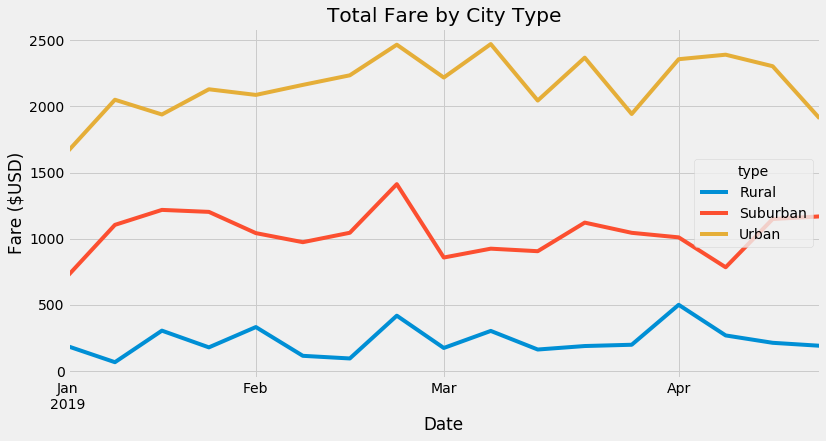

In [22]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
##
Pyber_weeks_df.plot(figsize=(12,6), title="Total Fare by City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("Date")
plt.savefig("Analysis/figure_challenge.png")
##

